# PyCaret 2 NLP Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.2.3'

# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data
data = get_data('kiva')

country                                                 en  \
0  Dominican Republic  "Banco Esperanza" is a group of 10 women looki...   
1  Dominican Republic  "Caminemos Hacia Adelante" or "Walking Forward...   
2  Dominican Republic  "Creciendo Por La Union" is a group of 10 peop...   
3  Dominican Republic  "Cristo Vive" ("Christ lives" is a group of 10...   
4  Dominican Republic  "Cristo Vive" is a large group of 35 people, 2...   

  gender  loan_amount nonpayment    sector  status  
0      F         1225    partner    Retail       0  
1      F         1975     lender  Clothing       0  
2      F         2175    partner  Clothing       0  
3      F         1425    partner  Clothing       0  
4      F         4025    partner      Food       0

In [18]:
data

country                                                 en  \
0     Dominican Republic  "Banco Esperanza" is a group of 10 women looki...   
1     Dominican Republic  "Caminemos Hacia Adelante" or "Walking Forward...   
2     Dominican Republic  "Creciendo Por La Union" is a group of 10 peop...   
3     Dominican Republic  "Cristo Vive" ("Christ lives" is a group of 10...   
4     Dominican Republic  "Cristo Vive" is a large group of 35 people, 2...   
...                  ...                                                ...   
6813               Kenya  Zipporah Wanjiku Wambu is 34 years old and a m...   
6814               Kenya  Zirah Ateso Achara is 38 years old she is marr...   
6815               Kenya  Zuleah Amoit is a member in one of the active ...   
6816               Kenya  Zuleya is an active member of PEMCI. She has s...   
6817               Kenya  Zuleya is Married with Nine Children she start...   

     gender  loan_amount nonpayment    sector  status  
0         F         1225    partner    Retail       0  
1         F         1975     lender  Clothing       0  
2         F         2175    partner  Clothing       0  
3         F         1425    partner  Clothing       0  
4         F         4025    partner      Food       0  
...     ...          ...        ...       ...     ...  
6813      F          550     lender      Food       1  
6814      F         1000     lender      Food       1  
6815      F          325     lender    Retail       1  
6816      F          450    partner    Retail       0  
6817      F          375    partner    Retail       0  

[6818 rows x 7 columns]

# 2. Initialize Setup

In [4]:
from pycaret.nlp import *
nlp1 = setup(data, target = 'en')

# 3. Create Model

In [5]:
models()

Name                  Reference
ID                                                               
lda        Latent Dirichlet Allocation     gensim/models/ldamodel
lsi           Latent Semantic Indexing     gensim/models/lsimodel
hdp     Hierarchical Dirichlet Process     gensim/models/hdpmodel
rp                  Random Projections      gensim/models/rpmodel
nmf  Non-Negative Matrix Factorization  sklearn.decomposition.NMF

In [6]:
lda = create_model('lda')

In [7]:
nmf = create_model('nmf', num_topics = 6)

# 4. Assign Labels

In [8]:
lda_results = assign_model(lda)
lda_results.head()

country                                                 en  \
0  Dominican Republic  group woman look receive small loan take small...   
1  Dominican Republic  walk forward group entrepreneur seek second lo...   
2  Dominican Republic  group people hope start business group look re...   
3  Dominican Republic  vive live group woman look receive loan young ...   
4  Dominican Republic  vive large group people hope take loan many se...   

  gender  loan_amount nonpayment    sector  status   Topic_0   Topic_1  \
0      F         1225    partner    Retail       0  0.498740  0.359898   
1      F         1975     lender  Clothing       0  0.155650  0.587741   
2      F         2175    partner  Clothing       0  0.382876  0.507585   
3      F         1425    partner  Clothing       0  0.459589  0.398094   
4      F         4025    partner      Food       0  0.259418  0.584867   

    Topic_2   Topic_3 Dominant_Topic  Perc_Dominant_Topic  
0  0.001713  0.139648        Topic 0                 0.50  
1  0.001535  0.255074        Topic 1                 0.59  
2  0.002188  0.107351        Topic 1                 0.51  
3  0.001791  0.140527        Topic 0                 0.46  
4  0.001677  0.154039        Topic 1                 0.58

In [20]:
nmf_results = assign_model(nmf)
nmf_results.head()

country                                                 en  \
0  Dominican Republic  group woman look receive small loan take small...   
1  Dominican Republic  walk forward group entrepreneur seek second lo...   
2  Dominican Republic  group people hope start business group look re...   
3  Dominican Republic  vive live group woman look receive loan young ...   
4  Dominican Republic  vive large group people hope take loan many se...   

  gender  loan_amount nonpayment    sector  status   Topic_0   Topic_1  \
0      F         1225    partner    Retail       0  0.000000  0.001336   
1      F         1975     lender  Clothing       0  0.004166  0.002358   
2      F         2175    partner  Clothing       0  0.006214  0.005603   
3      F         1425    partner  Clothing       0  0.001780  0.000000   
4      F         4025    partner      Food       0  0.011683  0.000000   

    Topic_2   Topic_3   Topic_4   Topic_5 Dominant_Topic  Perc_Dominant_Topic  
0  0.017794  0.005519  0.026159  0.003453        Topic 4                 0.48  
1  0.012787  0.003534  0.032506  0.005154        Topic 4                 0.54  
2  0.013655  0.003728  0.046270  0.001913        Topic 4                 0.60  
3  0.023190  0.000000  0.025830  0.004742        Topic 4                 0.47  
4  0.011563  0.003315  0.030790  0.002815        Topic 4                 0.51

# 5. Analyze Model

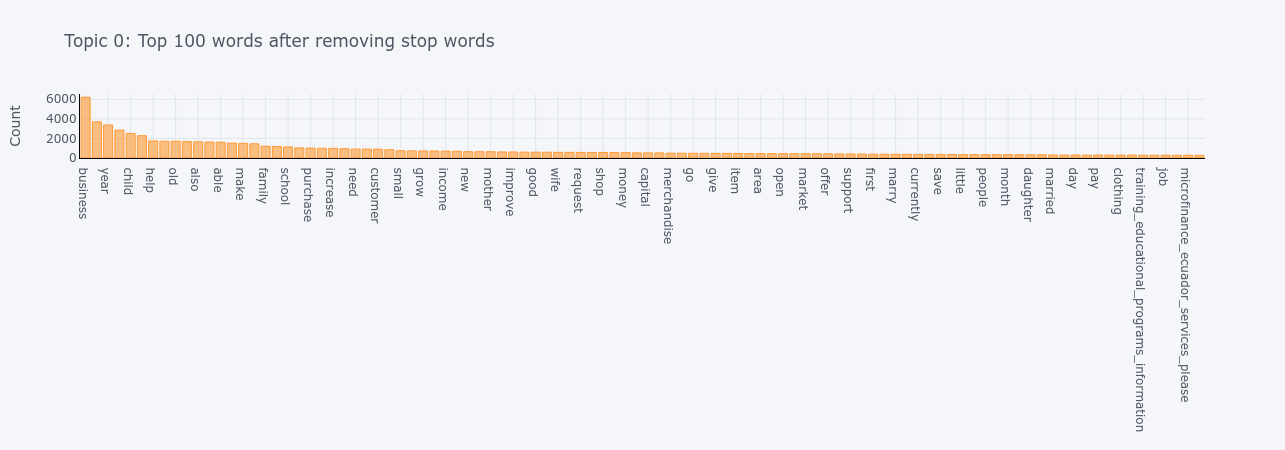

In [21]:
plot_model(nmf)

* Word Token Frequency - 'frequency'              
* Word Distribution Plot - 'distribution'
* Bigram Frequency Plot - 'bigram' 
* Trigram Frequency Plot - 'trigram'
* Sentiment Polarity Plot - 'sentiment'
* Part of Speech Frequency - 'pos'
* t-SNE (3d) Dimension Plot - 'tsne'
* Topic Model (pyLDAvis) - 'topic_model'
* Topic Infer Distribution - 'topic_distribution'
* Wordcloud - 'wordcloud'
* UMAP Dimensionality Plot - 'umap'

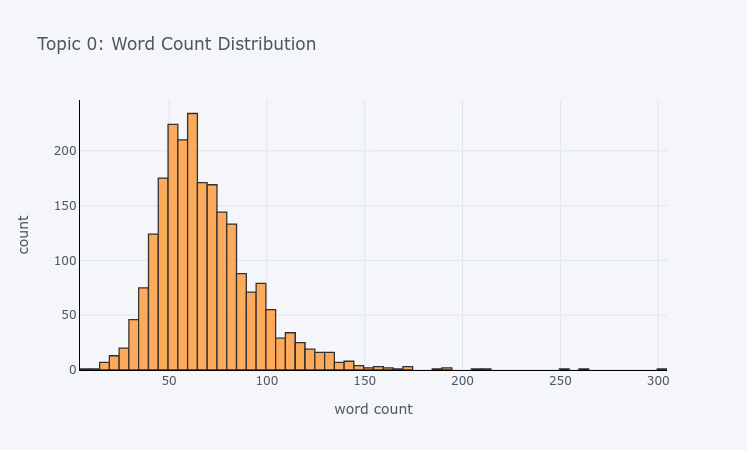

In [22]:
plot_model(nmf,plot='distribution')

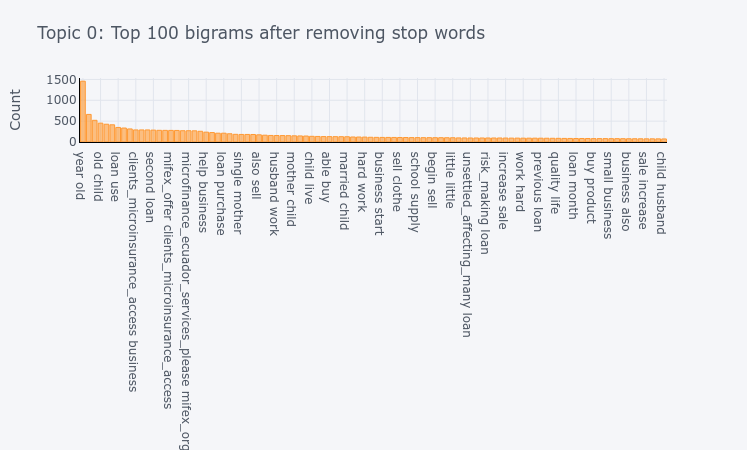

In [23]:
plot_model(nmf,plot='bigram')

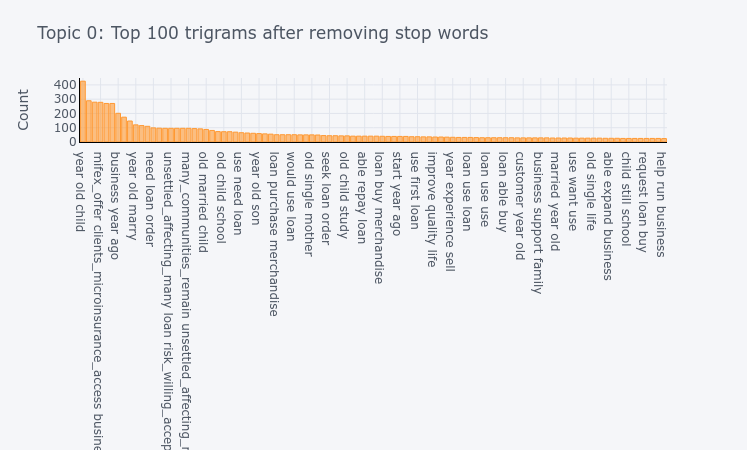

In [24]:
plot_model(nmf,plot='trigram')

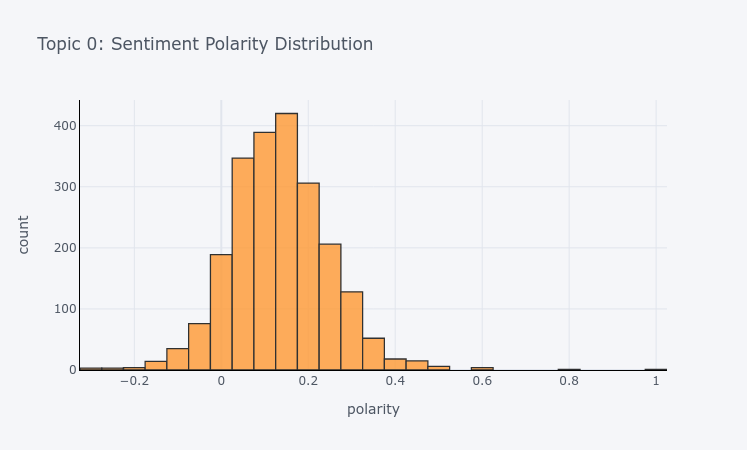

In [25]:
plot_model(nmf,plot='sentiment')

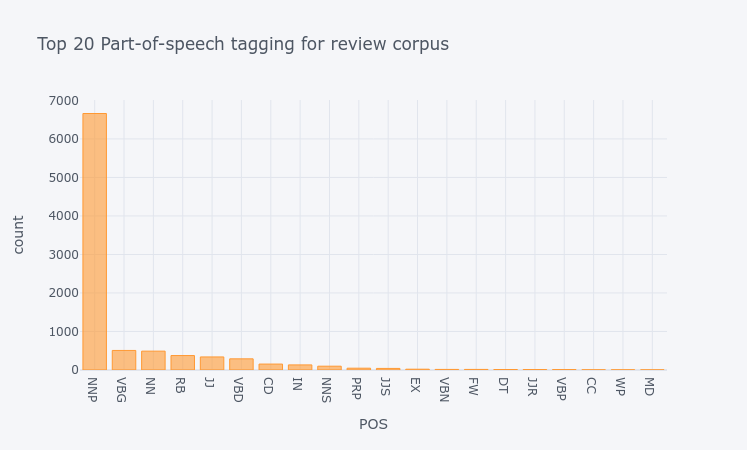

In [26]:
plot_model(nmf,plot='pos')

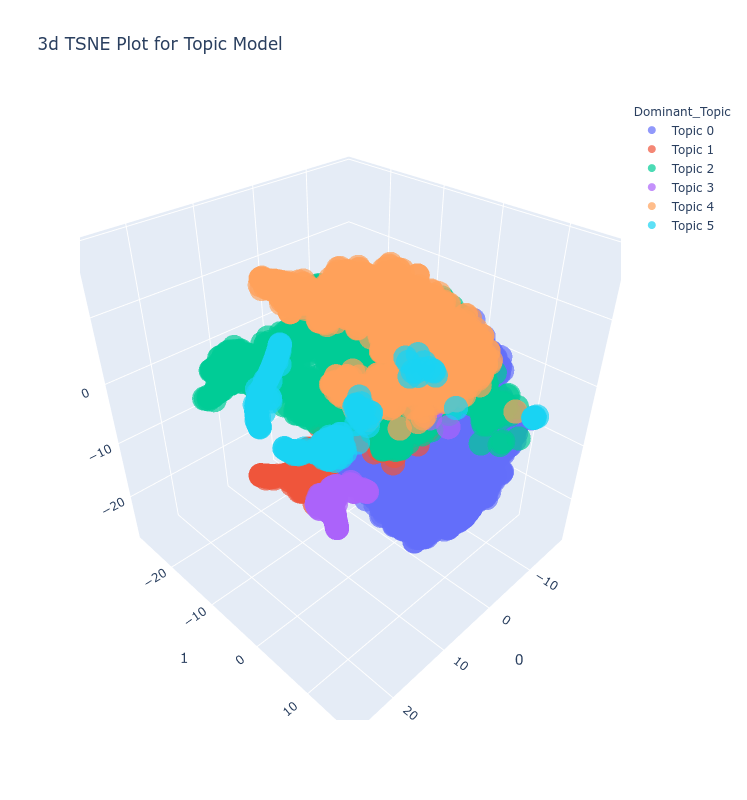

In [27]:
plot_model(nmf,plot='tsne')

In [28]:
plot_model(nmf,plot='topic_model')

SystemExit: (Type Error): Model not supported for plot = topic_model. Please see docstring for list of available models supported for topic_model.

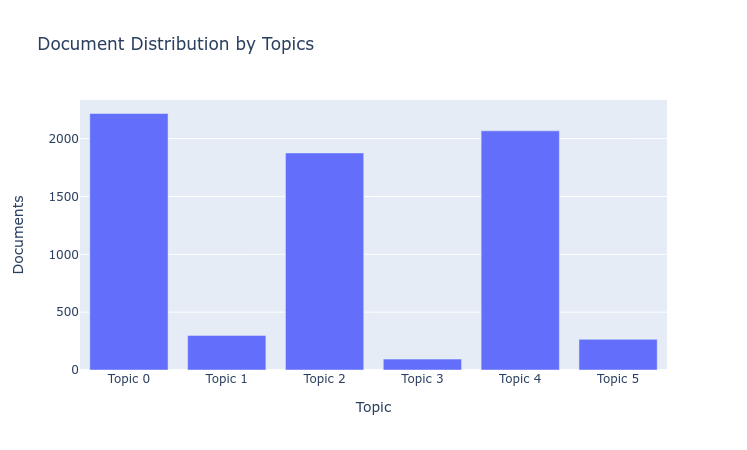

In [29]:
plot_model(nmf,plot='topic_distribution')

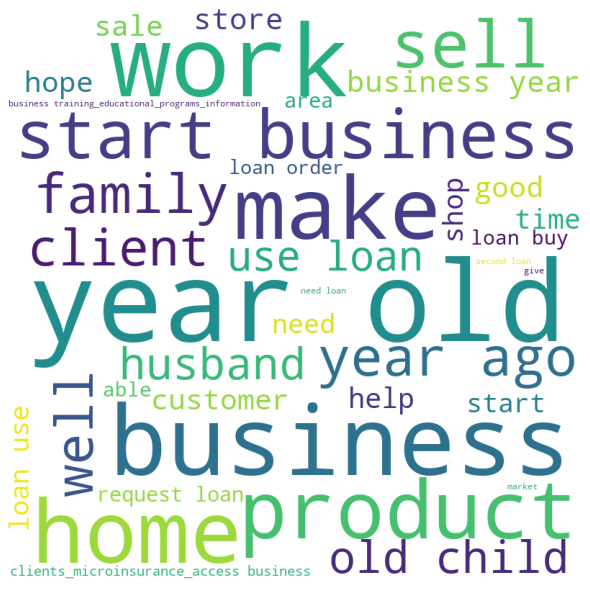

In [32]:
plot_model(nmf,plot='wordcloud')

In [31]:
plot_model(nmf,plot='umap')

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython mode backend)
Failed in nopython mode pipeline (step: nopython mode backend)
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function make_quicksort_impl.<locals>.run_quicksort at 0x7fe25b3c8af0>) found for signature:
 
 >>> run_quicksort(array(int32, 1d, C))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'register_jitable.<locals>.wrap.<locals>.ov_wrap': File: numba/core/extending.py: Line 150.
    With argument(s): '(array(int32, 1d, C))':
   Rejected as the implementation raised a specific error:
     UnsupportedError: Failed in nopython mode pipeline (step: analyzing bytecode)
   Use of unsupported opcode (LOAD_ASSERTION_ERROR) found
   
   File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/misc/quicksort.py", line 180:
       def run_quicksort(A):
           <source elided>
               while high - low >= SMALL_QUICKSORT:
                   assert n < MAX_STACK
                   ^

  raised from /home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/core/byteflow.py:269

During: resolving callee type: Function(<function make_quicksort_impl.<locals>.run_quicksort at 0x7fe25b3c8af0>)
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/np/arrayobj.py (5007)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/np/arrayobj.py", line 5007:
    def array_sort_impl(arr):
        <source elided>
        # Note we clobber the return value
        sort_func(arr)
        ^

During: lowering "$14call_method.5 = call $12load_method.4(func=$12load_method.4, args=[], kws=(), vararg=None)" at /home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/np/arrayobj.py (5017)
During: lowering "$8call_method.3 = call $4load_method.1(arr, func=$4load_method.1, args=[Var(arr, sparse.py:27)], kws=(), vararg=None)" at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (27)
During: resolving callee type: type(CPUDispatcher(<function arr_unique at 0x7fe25b7538b0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (40)

During: resolving callee type: type(CPUDispatcher(<function arr_unique at 0x7fe25b7538b0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (40)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py", line 40:
def arr_union(ar1, ar2):
    <source elided>
    else:
        return arr_unique(np.concatenate((ar1, ar2)))
        ^

During: resolving callee type: type(CPUDispatcher(<function arr_union at 0x7fe25b753a60>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (54)

During: resolving callee type: type(CPUDispatcher(<function arr_union at 0x7fe25b753a60>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (54)

During: resolving callee type: type(CPUDispatcher(<function arr_union at 0x7fe25b753a60>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (54)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py", line 54:
def sparse_sum(ind1, data1, ind2, data2):
    result_ind = arr_union(ind1, ind2)
    ^

During: resolving callee type: type(CPUDispatcher(<function sparse_sum at 0x7fe25b753dc0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (115)

During: resolving callee type: type(CPUDispatcher(<function sparse_sum at 0x7fe25b753dc0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (115)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py", line 115:
def sparse_diff(ind1, data1, ind2, data2):
    return sparse_sum(ind1, data1, ind2, -data2)
    ^

During: resolving callee type: type(CPUDispatcher(<function sparse_diff at 0x7fe25b7531f0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py (388)

During: resolving callee type: type(CPUDispatcher(<function sparse_diff at 0x7fe25b7531f0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py (388)

During: resolving callee type: type(CPUDispatcher(<function sparse_diff at 0x7fe25b7531f0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py (388)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py", line 388:
def sparse_euclidean_random_projection_split(inds, indptr, data, indices, rng_state):
    <source elided>
    hyperplane_offset = 0.0
    hyperplane_inds, hyperplane_data = sparse_diff(
    ^


<Figure size 720x432 with 0 Axes>

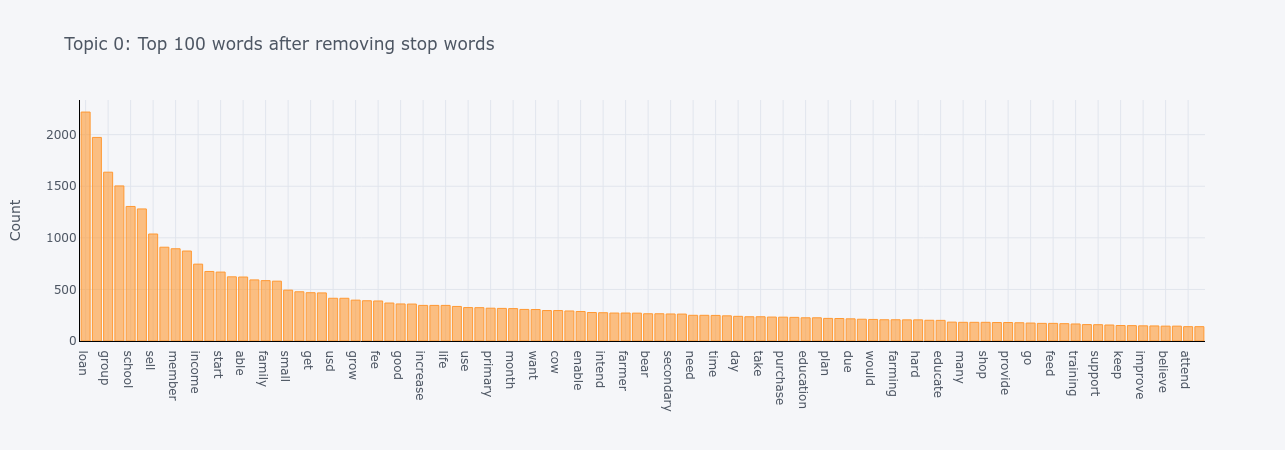

In [9]:
plot_model(lda)

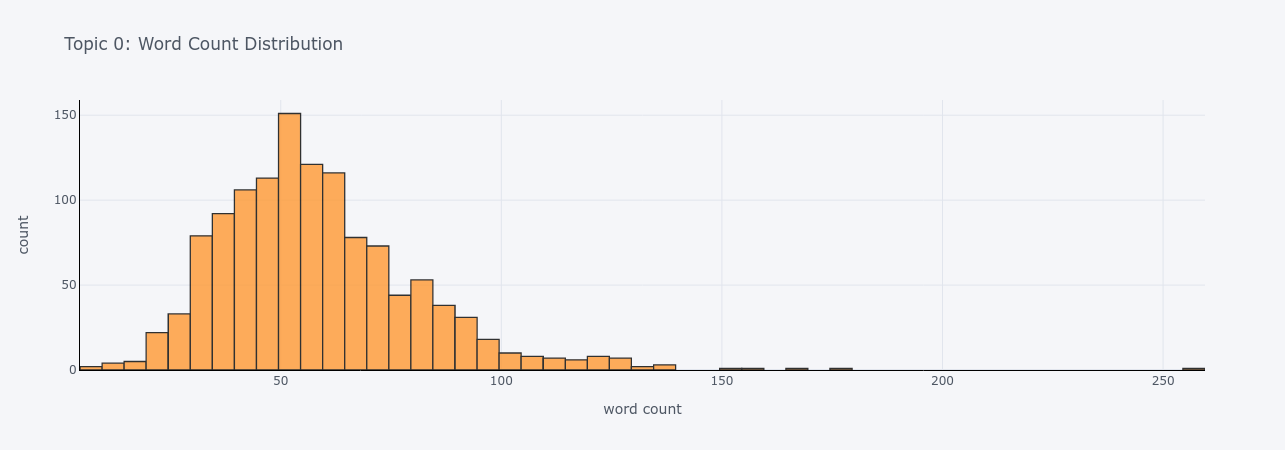

In [33]:
plot_model(lda,plot='distribution')

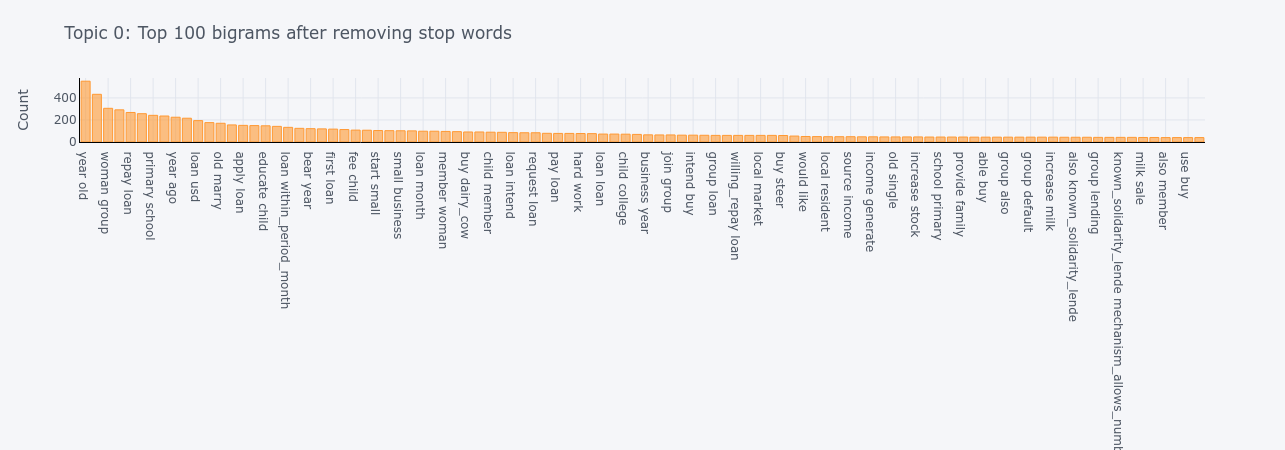

In [35]:
plot_model(lda, plot = 'bigram')

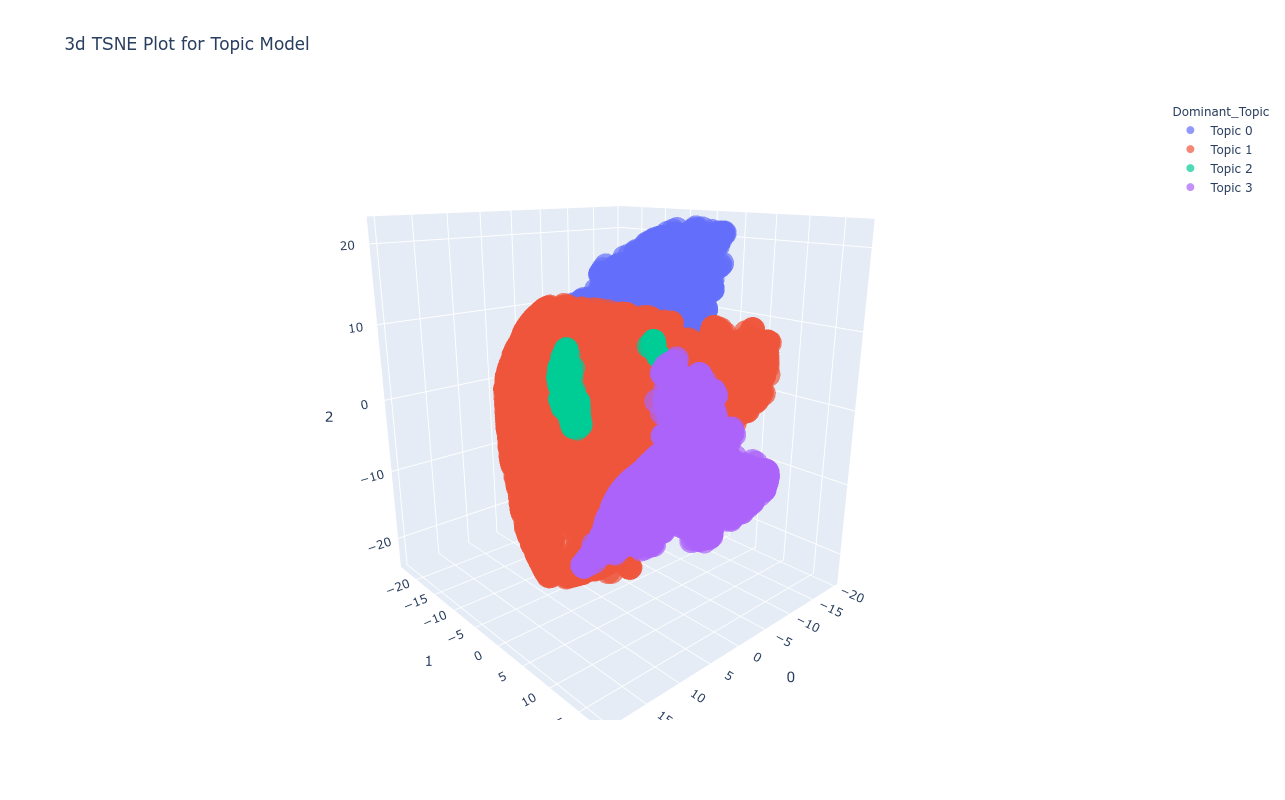

In [11]:
plot_model(lda, plot = 'tsne')

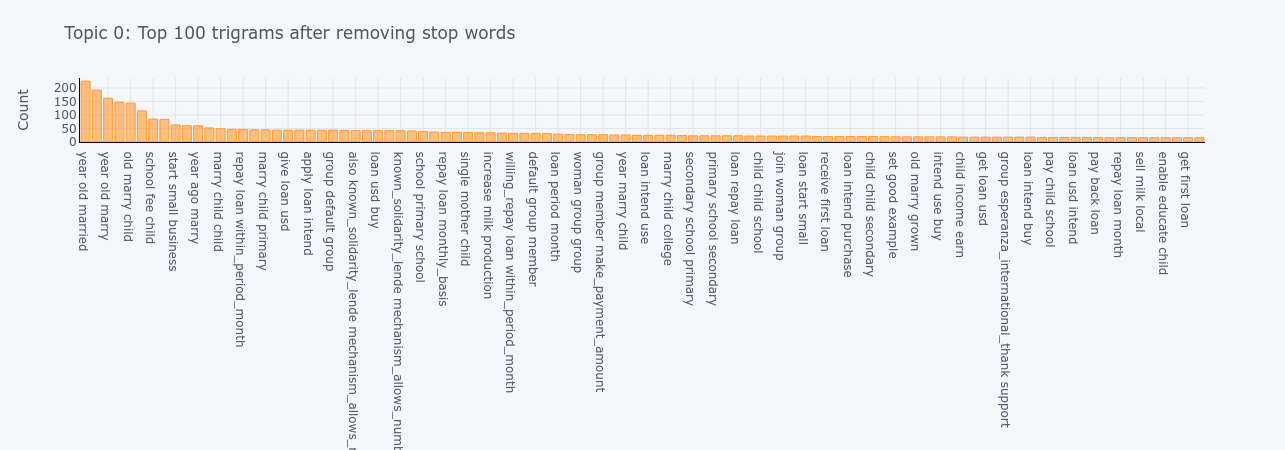

In [34]:
plot_model(lda,plot='trigram')

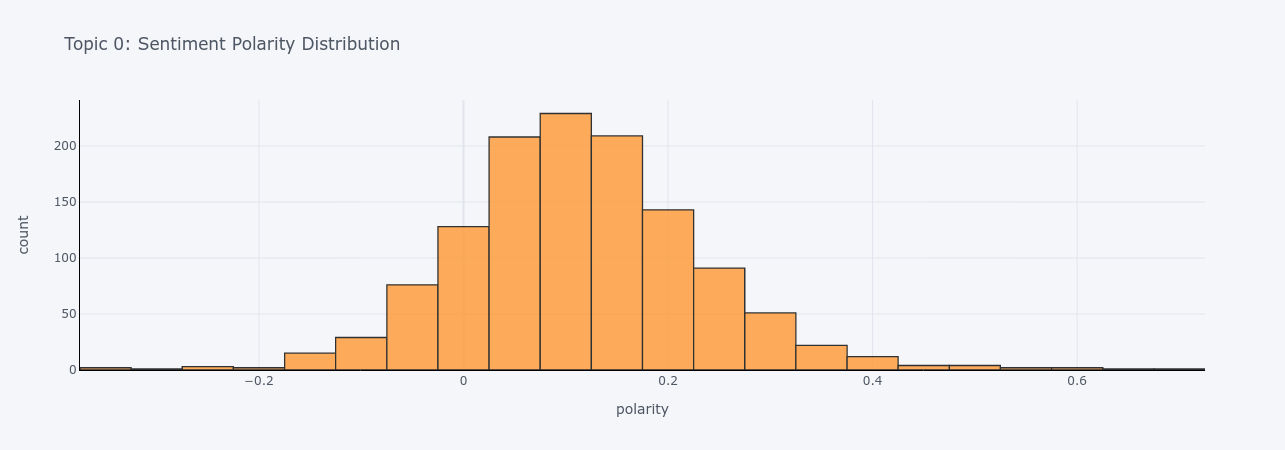

In [36]:
plot_model(lda,plot='sentiment')

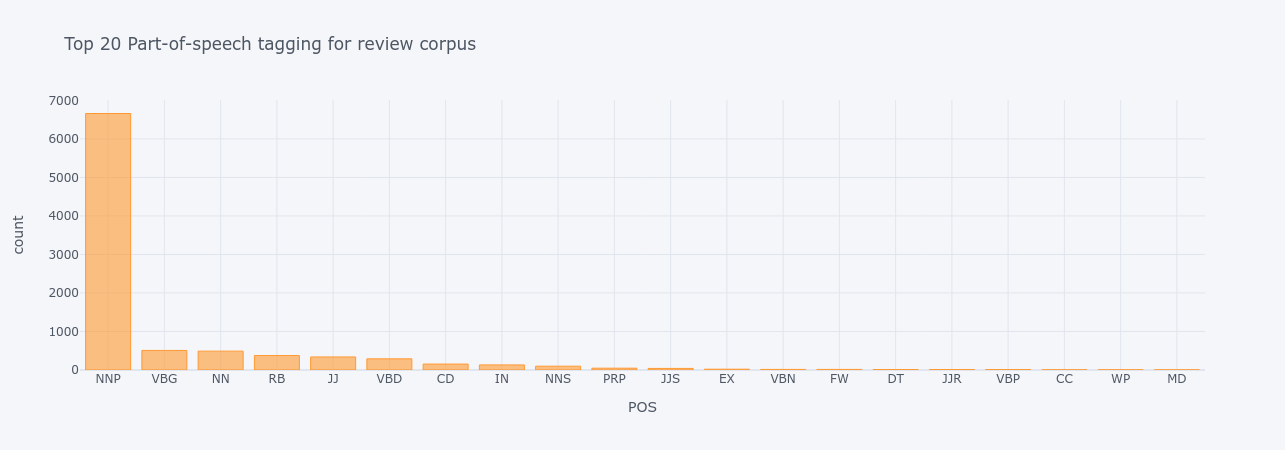

In [37]:
plot_model(lda,plot='pos')

In [38]:
plot_model(lda,plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.181239  0.132981       1        1  45.896223
3      0.069470  0.247679       2        1  26.287134
0      0.248814 -0.056520       3        1  21.886761
2     -0.137044 -0.324140       4        1   5.929882, topic_info=         Term         Freq        Total Category  logprob  loglift
616      farm  3268.000000  3268.000000  Default  30.0000  30.0000
1626   farmer  2289.000000  2289.000000  Default  29.0000  29.0000
2222  farming  1398.000000  1398.000000  Default  28.0000  28.0000
477     stock  2829.000000  2829.000000  Default  27.0000  27.0000
15      group  2816.000000  2816.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
15      group   162.684783  2816.238105   Topic4  -5.0849  -0.0262
772    mainly   105.401872   377.634115   Topic4  -5.5189   1.5490
100      area   120.698856  1423.849813   Topic4  -5.3834   0.3573
16     income   128.554160  3446.036173   Topic4  -5.3204  -0.4635
134      many   112.999203   885.538225   Topic4  -5.4493   0.7664

[275 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.886382   able
0         2  0.006761   able
0         3  0.106750   able
0         4  0.000178   able
47        2  0.997873    add
...     ...       ...    ...
123       2  0.298465   year
123       3  0.153542   year
123       4  0.000133   year
5479      1  0.062447  yield
5479      4  0.936708  yield

[514 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

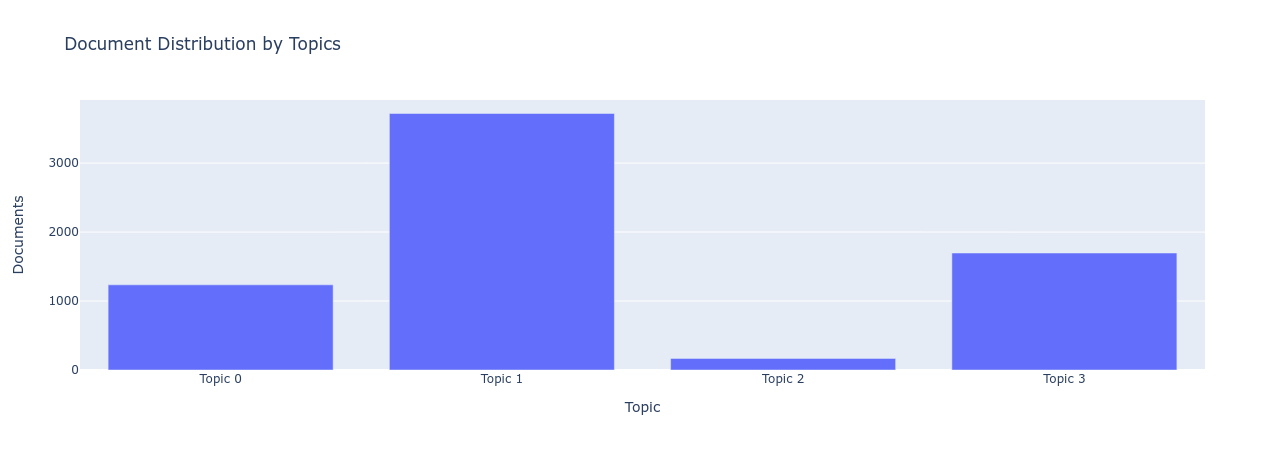

In [41]:
plot_model(lda,plot='topic_distribution')

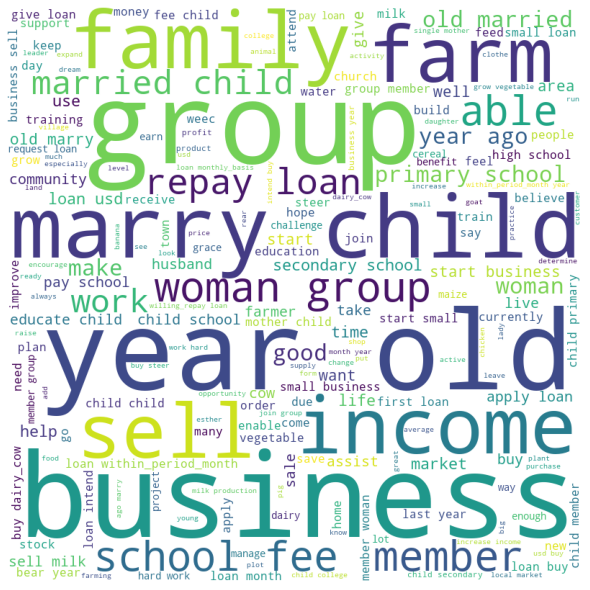

In [42]:
plot_model(lda,plot='wordcloud')

In [53]:
%%sh
python -m pip install "umap-learn" --force-reinstall

  Using cached umap_learn-0.4.6-py3-none-any.whl
  Using cached numba-0.51.2-cp39-cp39-linux_x86_64.whl
  Using cached llvmlite-0.34.0-cp39-cp39-linux_x86_64.whl
  Using cached numpy-1.19.4-cp39-cp39-manylinux2010_x86_64.whl (14.5 MB)
  Using cached scikit_learn-0.24.0-cp39-cp39-manylinux2010_x86_64.whl (23.8 MB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached scipy-1.6.0-cp39-cp39-manylinux1_x86_64.whl (27.3 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached setuptools-51.1.1-py3-none-any.whl (2.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.1.0
    Uninstalling threadpoolctl-2.1.0:
      Successfully uninstalled threadpoolctl-2.1.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 51.1.1
    Uninstalling setuptool

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.2.3 requires scikit-learn==0.23.2, but you have scikit-learn 0.24.0 which is incompatible.


In [54]:
plot_model(lda,plot='umap')

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython mode backend)
Failed in nopython mode pipeline (step: nopython mode backend)
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function make_quicksort_impl.<locals>.run_quicksort at 0x7fe25b3c8af0>) found for signature:
 
 >>> run_quicksort(array(int32, 1d, C))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'register_jitable.<locals>.wrap.<locals>.ov_wrap': File: numba/core/extending.py: Line 150.
    With argument(s): '(array(int32, 1d, C))':
   Rejected as the implementation raised a specific error:
     UnsupportedError: Failed in nopython mode pipeline (step: analyzing bytecode)
   Use of unsupported opcode (LOAD_ASSERTION_ERROR) found
   
   File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/misc/quicksort.py", line 180:
       def run_quicksort(A):
           <source elided>
               while high - low >= SMALL_QUICKSORT:
                   assert n < MAX_STACK
                   ^

  raised from /home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/core/byteflow.py:269

During: resolving callee type: Function(<function make_quicksort_impl.<locals>.run_quicksort at 0x7fe25b3c8af0>)
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/np/arrayobj.py (5007)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/np/arrayobj.py", line 5007:
    def array_sort_impl(arr):
        <source elided>
        # Note we clobber the return value
        sort_func(arr)
        ^

During: lowering "$14call_method.5 = call $12load_method.4(func=$12load_method.4, args=[], kws=(), vararg=None)" at /home/thom/venvs/pycaret/lib/python3.9/site-packages/numba/np/arrayobj.py (5017)
During: lowering "$8call_method.3 = call $4load_method.1(arr, func=$4load_method.1, args=[Var(arr, sparse.py:27)], kws=(), vararg=None)" at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (27)
During: resolving callee type: type(CPUDispatcher(<function arr_unique at 0x7fe25b7538b0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (40)

During: resolving callee type: type(CPUDispatcher(<function arr_unique at 0x7fe25b7538b0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (40)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py", line 40:
def arr_union(ar1, ar2):
    <source elided>
    else:
        return arr_unique(np.concatenate((ar1, ar2)))
        ^

During: resolving callee type: type(CPUDispatcher(<function arr_union at 0x7fe25b753a60>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (54)

During: resolving callee type: type(CPUDispatcher(<function arr_union at 0x7fe25b753a60>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (54)

During: resolving callee type: type(CPUDispatcher(<function arr_union at 0x7fe25b753a60>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (54)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py", line 54:
def sparse_sum(ind1, data1, ind2, data2):
    result_ind = arr_union(ind1, ind2)
    ^

During: resolving callee type: type(CPUDispatcher(<function sparse_sum at 0x7fe25b753dc0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (115)

During: resolving callee type: type(CPUDispatcher(<function sparse_sum at 0x7fe25b753dc0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py (115)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/sparse.py", line 115:
def sparse_diff(ind1, data1, ind2, data2):
    return sparse_sum(ind1, data1, ind2, -data2)
    ^

During: resolving callee type: type(CPUDispatcher(<function sparse_diff at 0x7fe25b7531f0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py (388)

During: resolving callee type: type(CPUDispatcher(<function sparse_diff at 0x7fe25b7531f0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py (388)

During: resolving callee type: type(CPUDispatcher(<function sparse_diff at 0x7fe25b7531f0>))
During: typing of call at /home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py (388)


File "../../../../../home/thom/venvs/pycaret/lib/python3.9/site-packages/umap/rp_tree.py", line 388:
def sparse_euclidean_random_projection_split(inds, indptr, data, indices, rng_state):
    <source elided>
    hyperplane_offset = 0.0
    hyperplane_inds, hyperplane_data = sparse_diff(
    ^


<Figure size 720x432 with 0 Axes>

In [59]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

NoneType